In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, Flatten, Input
from sklearn.utils.class_weight import compute_class_weight

XGBoost

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]


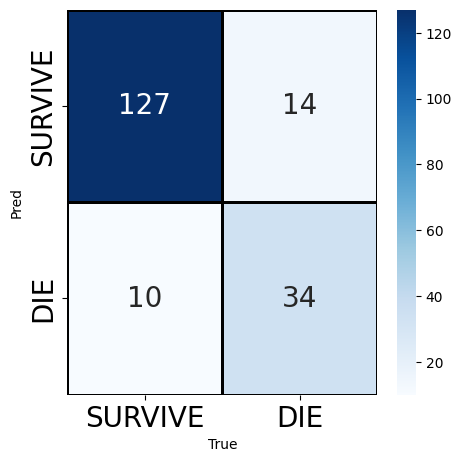

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       137
           1       0.77      0.71      0.74        48

    accuracy                           0.87       185
   macro avg       0.84      0.82      0.83       185
weighted avg       0.87      0.87      0.87       185



In [2]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

path = r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv'
data = pd.read_csv(path)
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')


columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag','died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['icu_times', 'icu_times_total', 'hear_last_Asystole', 'hear_last_Normal Sinus', 'hear_last_Other/Remarks']]
#X = X[['bun_min', 'bun_avg', 'car_avg', 'pla_avg', 'hea_min', 'hea_max', 'hea_avg', 'spo_min', 'spo_avg', 'spo_alarms']]
#X = X[['icu_duration_hour', 'figglu_min', 'pot_avg', 'hem_avg', 'bun_min', 'bun_max', 'bun_avg', 'car_avg', 'pla_min', 
#       'pla_avg', 'wbc_min', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'res_min', 'res_avg', 'spo_min', 'spo_avg', 'spo_alarms']]
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = data['died_immediately']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64, stratify=y)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test.to_numpy())
labels = ['SURVIVE','DIE']
CM = confusion_matrix(y_test,y_pred)
CM = pd.DataFrame(CM, index = labels, columns = labels)
plt.figure(figsize = (5,5))
sns.heatmap(CM.T,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels,annot_kws={"fontsize":20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

print(classification_report(y_test, y_pred))

Startified K Fold for single XGBoost

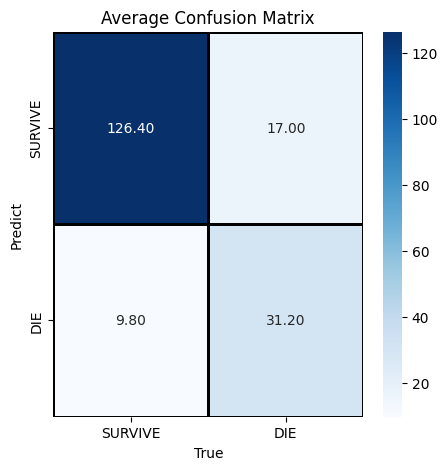

Class SURVIVE - Precision: 0.88, Recall: 0.93, F1 Score: 0.90, Support: 136.20000000000002
Class DEATH   - Precision: 0.76, Recall: 0.65, F1 Score: 0.70, Support: 48.2
Overall Accuracy: 0.8547


In [3]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

path = r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv'
path = r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv'

data = pd.read_csv(path)

columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag','died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['icu_times', 'icu_times_total', 'hear_last_Asystole', 'hear_last_Normal Sinus', 'hear_last_Other/Remarks']]
#X = X[['bun_min', 'bun_avg', 'car_avg', 'pla_avg', 'hea_min', 'hea_max', 'hea_avg', 'spo_min', 'spo_avg', 'spo_alarms']]
#X = X[['bun_min', 'bun_max', 'car_avg', 'pla_min', 'hea_min', 'hea_max', 'hea_avg', 'spo_min', 'spo_max', 'spo_alarms']]
#X = X[['icu_duration_hour', 'figglu_min', 'pot_avg', 'hem_avg', 'bun_min', 'bun_max', 'bun_avg', 'car_avg', 'pla_min', 
#       'pla_avg', 'wbc_min', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'res_min', 'res_avg', 'spo_min', 'spo_avg', 'spo_alarms']]
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X = pd.DataFrame(X_scale, columns=X.columns, index=X.index)


y = data['died_immediately']

skf = StratifiedKFold(n_splits=5, random_state=64, shuffle=True)

confusion_matrices = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)

mean_cm_df = pd.DataFrame(mean_cm, index=['SURVIVE', 'DIE'], columns=['SURVIVE', 'DIE'])

plt.figure(figsize=(5, 5))
sns.heatmap(mean_cm_df.T, cmap="Blues", annot=True, fmt=".2f", linecolor='black', linewidth=1, 
            xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Average Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

TN, FP, FN, TP = mean_cm[0, 0], mean_cm[0, 1], mean_cm[1, 0], mean_cm[1, 1]

precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0

recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0

f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

accuracy = (TP + TN) / (TP + TN + FP + FN)

support_0 = TN + FP
support_1 = TP + FN

print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
print(f"Overall Accuracy: {accuracy:.4f}")

Stacking xgboost

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8540540540540541
Confusion Matrix:
 [[126  11]
 [ 16  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       137
           1       0.74      0.67      0.70        48

    accuracy                           0.85       185
   macro avg       0.82      0.79      0.80       185
weighted avg       0.85      0.85      0.85       185

norm
Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy 

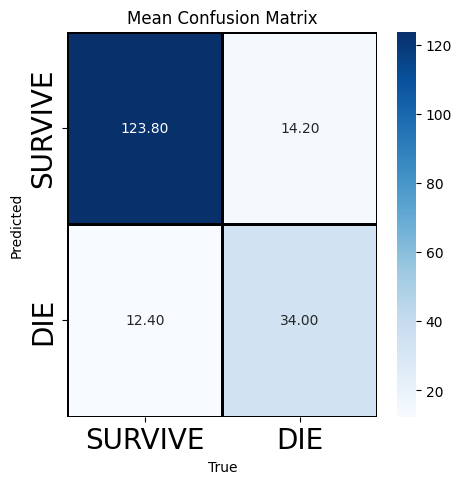

Class SURVIVE - Precision: 0.90, Recall: 0.91, F1 Score: 0.90, Support: 136.2
Class DEATH   - Precision: 0.73, Recall: 0.71, F1 Score: 0.72, Support: 48.2
Overall Accuracy: 0.8557


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

def train_stackXGB(X_train, y_train, thresh = 0.5):
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size=int(X_train_neg.shape[0]/3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []

    for train_idx, _ in skf.split(X_train_neg, y_train_neg):
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        num_neg = np.sum(y_fold == 0)
        num_pos = np.sum(y_fold == 1)
        scale_pos_weight = num_neg / num_pos

        model = xgb.XGBClassifier(#objective='binary:logistic', 
                                  use_label_encoder=False, 
                                  eval_metric='logloss',
                                  #reg_lambda = 5, 
                                  scale_pos_weight = scale_pos_weight
                                  #reg_alpha = 1
                                  )
        model.fit(X_fold, y_fold)
        models.append(model)

        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)

    final_pred = lin_reg.predict(predictions)
    final_pred = (final_pred > 0.5).astype(int) 
    
    
    
    ########## normalize scores
    #if norm :
    #    print('niorm')
    #    stakxgb_scores = lin_reg.predict(predictions)
#
    #    mean_val = stakxgb_scores.mean()
    #    std_val = stakxgb_scores.std()
    #    standardized_scores = (stakxgb_scores - mean_val) / std_val
    #    min_val = standardized_scores.min()
    #    max_val = standardized_scores.max()
    #    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)
#
    #    final_pred = np.where(normalized_scores > thresh, 1,0) 

    print('Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)
    
    return models, lin_reg    

def test_models(models, lin_reg, X_test, y_test, thresh = 0.5, norm = False):
    print('Testing')
    test_predictions = []
    for model in models:
        pred = model.predict_proba(X_test)[:, 1] 
        test_predictions.append(pred)

    test_predictions = np.vstack(test_predictions).T

    final_pred = lin_reg.predict(test_predictions)

    final_pred_class = (final_pred > 0.5).astype(int) 
    
    #if norm:
    #    stakxgb_scores = lin_reg.predict(final_pred)
    #
    #    mean_val = stakxgb_scores.mean()
    #    std_val = stakxgb_scores.std()
    #    standardized_scores = (stakxgb_scores - mean_val) / std_val
    #    min_val = standardized_scores.min()
    #    max_val = standardized_scores.max()
    #    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)
#
    #    final_pred_class = np.where(normalized_scores > thresh, 1,0)  

    return final_pred_class
    

data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')

columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)

# XGB
#X = X[['age', 'gender', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 'figglu_min', 
#       'figglu_max', 'figglu_avg', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_max', 'hem_avg', 'chl_max', 'chl_avg', 
#       'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'car_min', 'car_max', 'car_avg', 'rbc_min', 
#       'rbc_max', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_max', 
#       'res_min', 'res_max', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_1st Deg AV Block', 
#       'hear_last_Normal Sinus']]

y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

xgbs, lin_reg = train_stackXGB(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg, X_test, y_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))




def cross_validate_models(X, y, norm = False,n_splits=5):
    if norm:
        print('norm')
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        xgbs, lin_reg = train_stackXGB(X_train, y_train, norm)
        
        final_pred_class = test_models(xgbs, lin_reg, X_test, y_test, norm)
        
        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")

cross_validate_models(X, y, norm=True)

# OCSVM

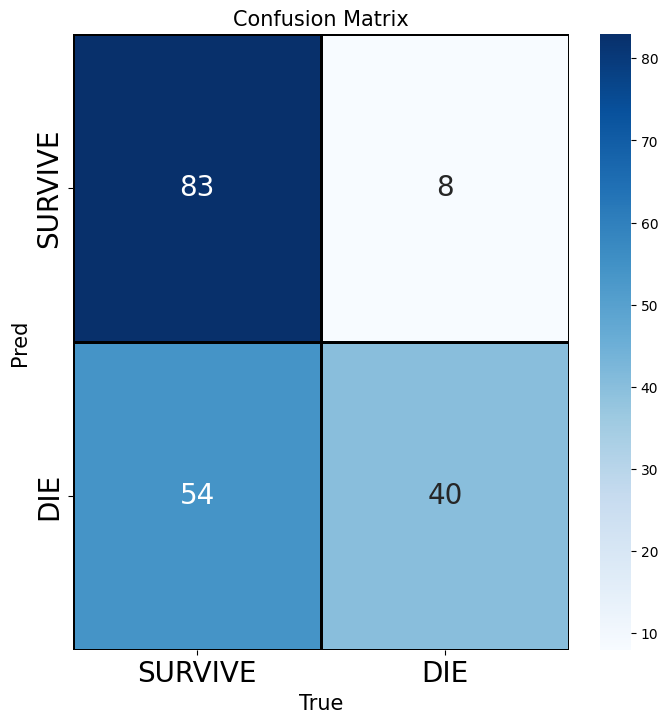

              precision    recall  f1-score   support

     SURVIVE       0.91      0.61      0.73       137
         DIE       0.43      0.83      0.56        48

    accuracy                           0.66       185
   macro avg       0.67      0.72      0.65       185
weighted avg       0.79      0.66      0.69       185

0.525810498011676


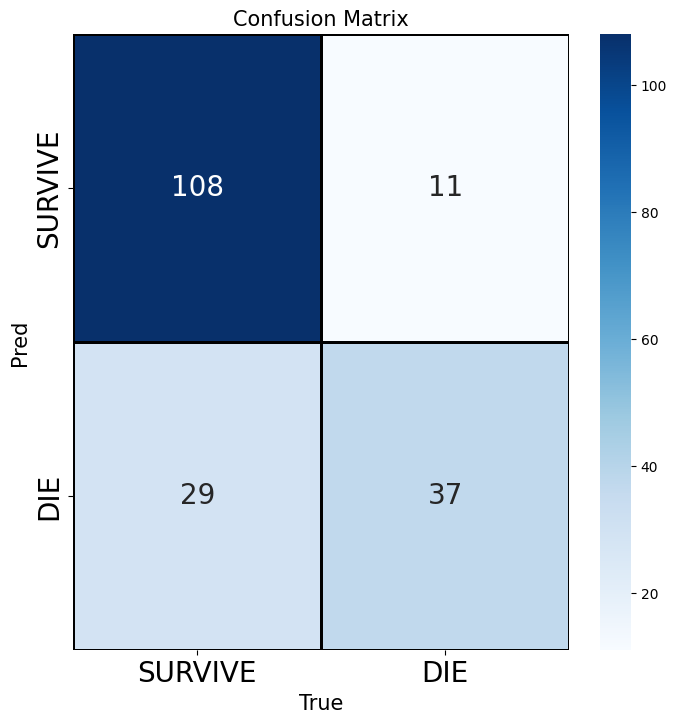

              precision    recall  f1-score   support

     SURVIVE       0.91      0.79      0.84       137
         DIE       0.56      0.77      0.65        48

    accuracy                           0.78       185
   macro avg       0.73      0.78      0.75       185
weighted avg       0.82      0.78      0.79       185



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

path = r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv'

data = pd.read_csv(path)
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')


columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag']
X = data.drop(columns=columns_to_drop)
y = data['died_immediately']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64, stratify=y)

x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

X_0 = x_train_scaled[y_train == 0].drop(columns=['died_immediately'])
X_1 = x_test_scaled[y_test == 1].drop(columns=['died_immediately'])
clf = OneClassSVM(nu=0.25, kernel="rbf", gamma=0.7)
clf.fit(X_0)


y_pred = clf.predict(x_test_scaled.drop(columns=['died_immediately']))
y_pred = np.where(y_pred == 1, 0, 1)  

labels = ['SURVIVE', 'DIE']
CM = confusion_matrix(y_test, y_pred)
CM = pd.DataFrame(CM, index=labels, columns=labels)

plt.figure(figsize=(8, 8))
sns.heatmap(CM.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('True', fontsize=15)
plt.ylabel('Pred', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))

svm_scores = clf.decision_function(x_test_scaled.drop(columns=['died_immediately']))
mean_val = svm_scores.mean()
std_val = svm_scores.std()
standardized_scores = (svm_scores - mean_val) / std_val
min_val = standardized_scores.min()
max_val = standardized_scores.max()
normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

# remains to be done
thresh_norm = (0 - min_val) / (max_val - min_val)
print(thresh_norm)

y_pred = np.where(normalized_scores > 0.45, 0,1)


labels = ['SURVIVE', 'DIE']
CM = confusion_matrix(y_test, y_pred)
CM = pd.DataFrame(CM, index=labels, columns=labels)

plt.figure(figsize=(8, 8))
sns.heatmap(CM.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('True', fontsize=15)
plt.ylabel('Pred', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

print(classification_report(y_test, y_pred, target_names=labels))



# Stacked XGBoost with one-class svm

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import OneClassSVM
import seaborn as sns

def train_stackXGB(X_train, y_train):
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size=int(X_train_neg.shape[0]/3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []

    for train_idx, _ in skf.split(X_train_neg, y_train_neg):
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        num_neg = np.sum(y_fold == 0)
        num_pos = np.sum(y_fold == 1)
        scale_pos_weight = num_neg / num_pos

        model = xgb.XGBClassifier(#objective='binary:logistic', 
                                  use_label_encoder=False, 
                                  eval_metric='logloss',
                                  #reg_lambda = 5, 
                                  scale_pos_weight = scale_pos_weight
                                  #reg_alpha = 1
                                  )
        model.fit(X_fold, y_fold)
        models.append(model)

        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)

    final_pred = lin_reg.predict(predictions)
    final_pred = (final_pred > 0.5).astype(int) 
    
    print('Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)
    
    return models, lin_reg    

def train_one_class_svm(X_train, y_train):
    svm_train_X = X_train[y_train == 0] 
    oc_svm = OneClassSVM(nu=0.25, kernel="rbf", gamma=0.7)
    oc_svm.fit(svm_train_X)
    print('OCSVM Train finish')
    
    return oc_svm

def combined_train(X_train, y_train):
    xgbs, lin_reg_xgb = train_stackXGB(X_train, y_train)
    xgb_predictions = []
    for model in xgbs:
        pred = model.predict_proba(X_train)[:, 1] 
        xgb_predictions.append(pred)

    xgb_predictions = np.vstack(xgb_predictions).T
    stakxgb_pred = lin_reg_xgb.predict(xgb_predictions).reshape(-1, 1)
    #stakxgb_pred = (stakxgb_pred > 0.5).astype(int) 
    

    ocsvm = train_one_class_svm(X_train, y_train)
    svm_scores = ocsvm.decision_function(X_train)
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)
    print(thresh)

    ocsvm_pred = normalized_scores.reshape(-1, 1)
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1).reshape(-1, 1)

    
    print(stakxgb_pred.shape)
    print(ocsvm_pred.shape)
    
    combined_predictions = np.hstack([stakxgb_pred, ocsvm_pred])


    final_lin_reg = LinearRegression()
    final_lin_reg.fit(combined_predictions, y_train)
    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    

    
    print('Final Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)

    return xgbs, lin_reg_xgb, ocsvm,final_lin_reg


def test_models(models, lin_reg_xgb, ocsvm, final_lin_reg, X_test):
    print('Testing')
    predictions = []
    for model in models:
        pred = model.predict_proba(X_test)[:, 1] 
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    stakxgb_pred = lin_reg_xgb.predict(predictions)
    
    svm_scores = ocsvm.decision_function(X_test)
    #print(svm_scores)
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)

    
    ocsvm_pred = normalized_scores
    #print(ocsvm_pred)
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1)
    
    combined_predictions = np.hstack([stakxgb_pred.reshape(-1, 1), ocsvm_pred.reshape(-1, 1)])
    #print(combined_predictions)
    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    
    return final_pred
    



def cross_validate_models(X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)
        
        final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)

        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")


No comrobidity

Train single

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
OCSVM Train finish
0.5467480518236639
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8702702702702703
Confusion Matrix:
 [[127  10]
 [ 14  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90     

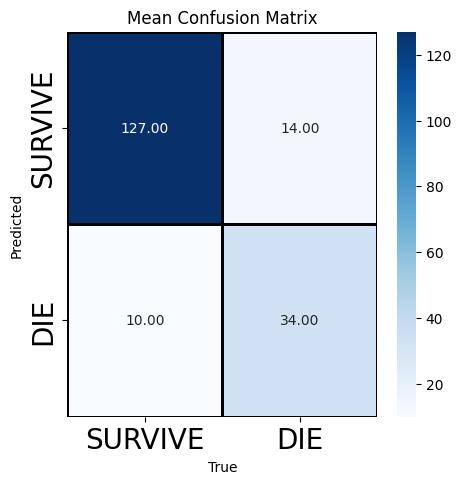

Cross val 

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
OCSVM Train finish
0.5351408876955034
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
Testing
Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy   

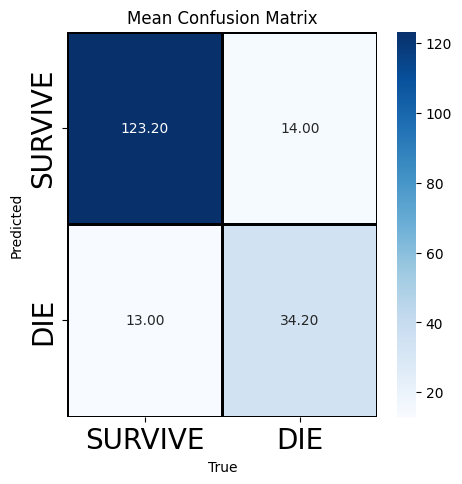

Class SURVIVE - Precision: 0.90, Recall: 0.90, F1 Score: 0.90, Support: 136.2
Class DEATH   - Precision: 0.72, Recall: 0.71, F1 Score: 0.72, Support: 48.2
Overall Accuracy: 0.8536


In [7]:


data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
#data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')
columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Train single\n')
xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))
cm = confusion_matrix(y_test, final_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Mean Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


print('Cross val \n')

cross_validate_models(X, y,)

With comorbidity

Train single

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
OCSVM Train finish
0.5443059644122018
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8540540540540541
Confusion Matrix:
 [[126  11]
 [ 16  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89     

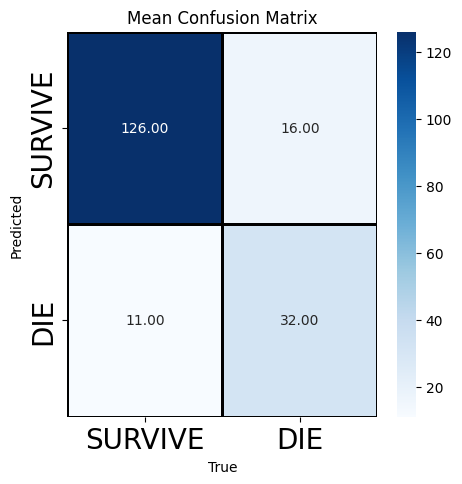

Cross val 

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
OCSVM Train finish
0.5318571388506508
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
Testing
Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy   

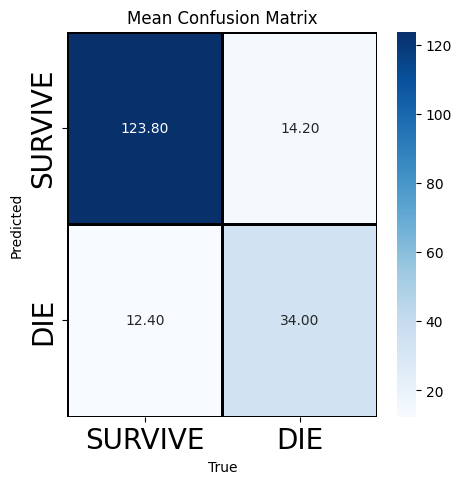

Class SURVIVE - Precision: 0.90, Recall: 0.91, F1 Score: 0.90, Support: 136.2
Class DEATH   - Precision: 0.73, Recall: 0.71, F1 Score: 0.72, Support: 48.2
Overall Accuracy: 0.8557


In [8]:
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')
columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Train single\n')
xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))
cm = confusion_matrix(y_test, final_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Mean Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print('Cross val \n')

cross_validate_models(X, y,)


# Stacked XGBoost with one-class svm Using RFE features

Train single

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
OCSVM Train finish
0.66822110876925
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8486486486486486
Confusion Matrix:
 [[125  12]
 [ 16  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0

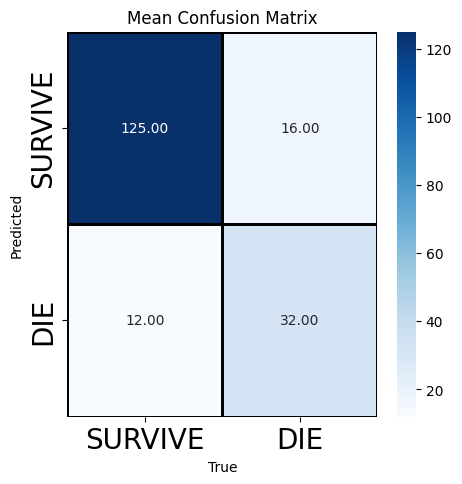

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
OCSVM Train finish
0.663780445869153
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
Testing
Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                

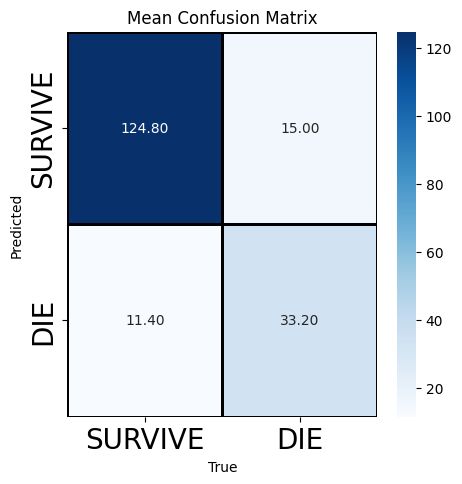

Class SURVIVE - Precision: 0.89, Recall: 0.92, F1 Score: 0.90, Support: 136.2
Class DEATH   - Precision: 0.74, Recall: 0.69, F1 Score: 0.72, Support: 48.2
Overall Accuracy: 0.8568


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


def train_stackXGB(X_train, y_train):
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size=int(X_train_neg.shape[0]/3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []

    for train_idx, _ in skf.split(X_train_neg, y_train_neg):
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        num_neg = np.sum(y_fold == 0)
        num_pos = np.sum(y_fold == 1)
        scale_pos_weight = num_neg / num_pos

        model = xgb.XGBClassifier(#objective='binary:logistic', 
                                  use_label_encoder=False, 
                                  eval_metric='logloss',
                                  #reg_lambda = 5, 
                                  scale_pos_weight = scale_pos_weight
                                  #reg_alpha = 1
                                  )
        model.fit(X_fold, y_fold)
        models.append(model)

        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)

    final_pred = lin_reg.predict(predictions)
    final_pred = (final_pred > 0.5).astype(int) 
    
    print('Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)
    
    return models, lin_reg    

def train_one_class_svm(X_train, y_train):
    svm_train_X = X_train[y_train == 0] 
    oc_svm = OneClassSVM(nu=0.25, kernel="rbf", gamma=0.7)
    oc_svm.fit(svm_train_X)
    print('OCSVM Train finish')
    
    return oc_svm

def combined_train(X_train, y_train, features):
    xgb_feature = features['XGB']
    xgbs, lin_reg_xgb = train_stackXGB(X_train[xgb_feature], y_train)
    xgb_predictions = []
    for model in xgbs:
        pred = model.predict_proba(X_train[xgb_feature])[:, 1] 
        xgb_predictions.append(pred)

    xgb_predictions = np.vstack(xgb_predictions).T
    stakxgb_pred = lin_reg_xgb.predict(xgb_predictions).reshape(-1, 1)
    #stakxgb_pred = (stakxgb_pred > 0.5).astype(int) 
    
    svm_feature = features['OCSVM']
    ocsvm = train_one_class_svm(X_train[svm_feature], y_train)
    svm_scores = ocsvm.decision_function(X_train[svm_feature])
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)
    print(thresh)

    ocsvm_pred = normalized_scores.reshape(-1, 1)
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1).reshape(-1, 1)

    
    print(stakxgb_pred.shape)
    print(ocsvm_pred.shape)
    
    combined_predictions = np.hstack([stakxgb_pred, ocsvm_pred])


    final_lin_reg = LinearRegression()
    final_lin_reg.fit(combined_predictions, y_train)
    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    

    
    print('Final Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)

    return xgbs, lin_reg_xgb, ocsvm,final_lin_reg


def test_models(models, lin_reg_xgb, ocsvm, final_lin_reg, X_test, features):
    print('Testing')
    xgb_feature = features['XGB']
    predictions = []
    for model in models:
        pred = model.predict_proba(X_test[xgb_feature])[:, 1] 
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    stakxgb_pred = lin_reg_xgb.predict(predictions)
    
    svm_feature = features['OCSVM']
    svm_scores = ocsvm.decision_function(X_test[svm_feature])
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)

    
    ocsvm_pred = normalized_scores
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1)
    
    combined_predictions = np.hstack([stakxgb_pred.reshape(-1, 1), ocsvm_pred.reshape(-1, 1)])

    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    
    return final_pred

def cross_validate_models(X, y,feature ,n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train, feature)
        
        final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test, feature)

        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")


features = {'OCSVM': ['age', 'icu_times', 'icu_times_total', 'icu_times_sepsis', 'icu_times_total_sepsis', 'glu_min', 'glu_avg', 
          'figglu_min', 'figglu_max', 'figglu_avg', 'pot_min', 'pot_max', 'pot_avg', 'hem_min', 'hem_max', 'hem_avg', 
          'bun_min', 'bun_avg', 'cre_avg', 'hemo_max', 'car_min', 'car_max', 'car_avg', 'pla_min', 'wbc_min', 'hea_min',
          'hea_max', 'hea_avg', 'mag_min', 'res_min', 'res_avg', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_min',
          'temp_max', 'hear_mode_1st Deg AV Block', 'hear_mode_Atrial Flutter', 'hear_mode_Sinus Brady', 
          'hear_mode_Sinus Tachy', 'hear_mode_V Paced', 'hear_last_Asystole', 'hear_last_Atrial Fib', 
          'hear_last_Normal Sinus', 'hear_last_Other/Remarks', 'hear_last_Supravent Tachy', 'hear_last_V Paced'], 
 'XGB': ['age', 'gender', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 
         'figglu_min', 'figglu_max', 'figglu_avg', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_max', 'hem_avg', 
         'chl_max', 'chl_avg', 'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'car_min', 
         'car_max', 'car_avg', 'rbc_min', 'rbc_max', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 
         'hea_min', 'hea_max', 'hea_avg', 'mag_max', 'res_min', 'res_max', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 
         'temp_max', 'temp_avg', 'hear_last_1st Deg AV Block', 'hear_last_Normal Sinus']}

data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')
columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Train single\n')
xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train, features)

final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test,features)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))
cm = confusion_matrix(y_test, final_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Mean Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

cross_validate_models(X, y, features)



# StackXGB+OCSVM Use logistic regression (not linear reg)

Train single

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
OCSVM Train finish
0.5443059644122018
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
Testing
[ 5.67569053e-01  2.32956056e-01 -7.72579122e-01 -4.99397277e-01
 -5.47292719e-01  3.60579886e-01  6.22126755e-01  2.85019120e-01
  1.06593604e+00  1.09985360e-01  1.08916005e+00  3.04806062

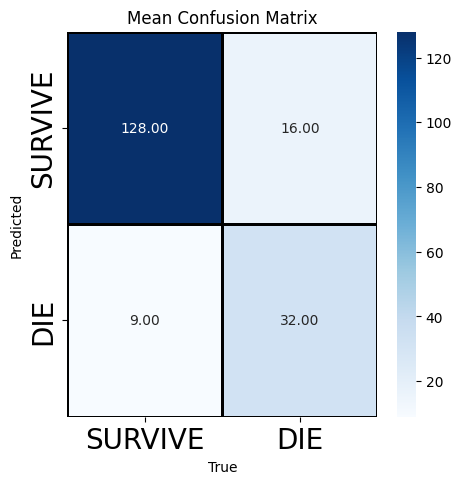

Cross val 

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
OCSVM Train finish
0.5318571388506508
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[545   0]
 [  0 192]]
Testing
[ 1.71057699  0.5125116  -0.44928913  0.53757412  0.07176961  0.71281
  0.93014608 -2.05234399  0.58343541  0.25596643  0.08165585 -1.6047554
 -1.23356382  0.41563094 -0.42749286 -1.11835121  

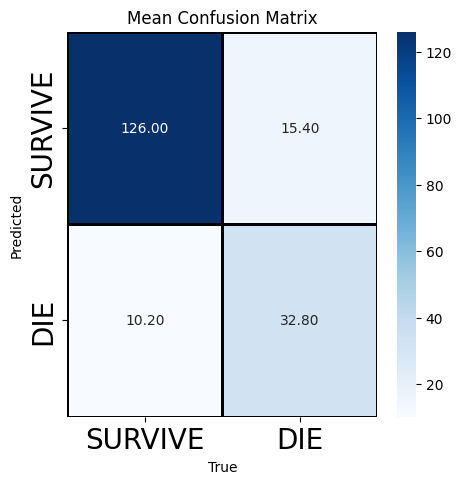

Class SURVIVE - Precision: 0.89, Recall: 0.93, F1 Score: 0.91, Support: 136.2
Class DEATH   - Precision: 0.76, Recall: 0.68, F1 Score: 0.72, Support: 48.199999999999996
Overall Accuracy: 0.8612


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import OneClassSVM
import seaborn as sns

def train_stackXGB(X_train, y_train):
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size=int(X_train_neg.shape[0]/3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []

    for train_idx, _ in skf.split(X_train_neg, y_train_neg):
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        num_neg = np.sum(y_fold == 0)
        num_pos = np.sum(y_fold == 1)
        scale_pos_weight = num_neg / num_pos

        model = xgb.XGBClassifier(#objective='binary:logistic', 
                                  use_label_encoder=False, 
                                  eval_metric='logloss',
                                  #reg_lambda = 5, 
                                  scale_pos_weight = scale_pos_weight
                                  #reg_alpha = 1
                                  )
        model.fit(X_fold, y_fold)
        models.append(model)

        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)

    final_pred = lin_reg.predict(predictions)
    final_pred = (final_pred > 0.5).astype(int) 
    
    print('Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)
    
    return models, lin_reg    

def train_one_class_svm(X_train, y_train):
    svm_train_X = X_train[y_train == 0] 
    oc_svm = OneClassSVM(nu=.25, kernel="rbf", gamma=0.7)
    oc_svm.fit(svm_train_X)
    print('OCSVM Train finish')
    
    return oc_svm

def combined_train(X_train, y_train):
    xgbs, lin_reg_xgb = train_stackXGB(X_train, y_train)
    xgb_predictions = []
    for model in xgbs:
        pred = model.predict_proba(X_train)[:, 1] 
        xgb_predictions.append(pred)

    xgb_predictions = np.vstack(xgb_predictions).T
    stakxgb_pred = lin_reg_xgb.predict(xgb_predictions).reshape(-1, 1)
    #stakxgb_pred = (stakxgb_pred > 0.5).astype(int) 
    

    ocsvm = train_one_class_svm(X_train, y_train)
    svm_scores = ocsvm.decision_function(X_train)
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)
    print(thresh)

    #ocsvm_pred = normalized_scores.reshape(-1, 1)
    ocsvm_pred = np.where(normalized_scores > 0.45, 0,1).reshape(-1, 1)

    
    print(stakxgb_pred.shape)
    print(ocsvm_pred.shape)
    
    combined_predictions = np.hstack([stakxgb_pred, ocsvm_pred])


    final_logi_reg = LogisticRegression()
    final_logi_reg.fit(combined_predictions, y_train)
    final_pred = final_logi_reg.predict(combined_predictions)
    #final_pred = np.where(final_pred < 0.5, 0 , 1)
    

    
    print('Final Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)

    return xgbs, lin_reg_xgb, ocsvm,final_logi_reg


def test_models(models, lin_reg_xgb, ocsvm, final_logi_reg, X_test):
    print('Testing')
    predictions = []
    for model in models:
        pred = model.predict_proba(X_test)[:, 1] 
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    stakxgb_pred = lin_reg_xgb.predict(predictions)
    
    svm_scores = ocsvm.decision_function(X_test)
    print(svm_scores)
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)

    
    #ocsvm_pred = normalized_scores
    ocsvm_pred = np.where(normalized_scores > 0.45, 0,1)
    
    combined_predictions = np.hstack([stakxgb_pred.reshape(-1, 1), ocsvm_pred.reshape(-1, 1)])

    final_pred = final_logi_reg.predict(combined_predictions)
    #final_pred = np.where(final_pred < 0.5, 0 , 1)
    
    return final_pred
    



def cross_validate_models(X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)
        
        final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)

        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")

data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')
columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
# XGB
#X = X[['age', 'gender', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 'figglu_min', 
#       'figglu_max', 'figglu_avg', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_max', 'hem_avg', 'chl_max', 'chl_avg', 
#       'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'car_min', 'car_max', 'car_avg', 'rbc_min', 
#       'rbc_max', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_max', 
#       'res_min', 'res_max', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_1st Deg AV Block', 
#       'hear_last_Normal Sinus']]

y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Train single\n')
xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))
cm = confusion_matrix(y_test, final_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Mean Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


print('Cross val \n')
cross_validate_models(X, y,)

# Stacking random forest
Using random forest rather than xgboost 

Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       193

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[544   0]
 [  0 193]]
Testing
Accuracy on Test Set: 0.9081081081081082
Confusion Matrix:
 [[134   3]
 [ 14  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       137
           1       0.92      0.71      0.80        48

    accuracy                           0.91       185
   macro avg       0.91      0.84      0.87       185
weighted avg       0.91      0.91      0.90       185

norm
Train result
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       192

    accuracy 

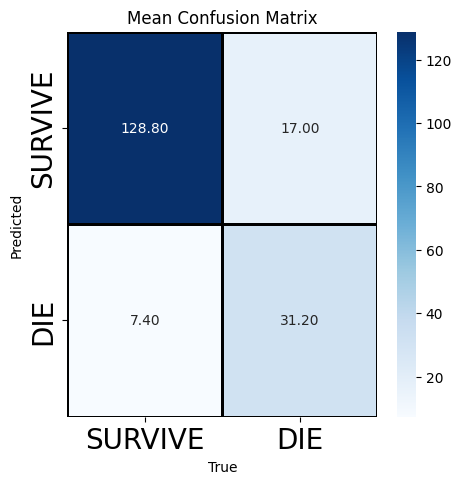

Class SURVIVE - Precision: 0.88, Recall: 0.95, F1 Score: 0.91, Support: 136.20000000000002
Class DEATH   - Precision: 0.81, Recall: 0.65, F1 Score: 0.72, Support: 48.2
Overall Accuracy: 0.8677


In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

def train_stackRF(X_train, y_train, thresh = 0.5, ):
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size=int(X_train_neg.shape[0]/3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []

    for train_idx, _ in skf.split(X_train_neg, y_train_neg):
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        num_neg = np.sum(y_fold == 0)
        num_pos = np.sum(y_fold == 1)
        scale_pos_weight = num_neg / num_pos

        model = RandomForestClassifier()
        model.fit(X_fold, y_fold)
        models.append(model)

        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)

    final_pred = lin_reg.predict(predictions)
    final_pred = (final_pred > 0.5).astype(int) 
    
    print('Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)
    
    return models, lin_reg    
    
    
    

def test_models(models, lin_reg, X_test, y_test, thresh = 0.5, norm = False):
    print('Testing')
    test_predictions = []
    for model in models:
        pred = model.predict_proba(X_test)[:, 1] 
        test_predictions.append(pred)

    test_predictions = np.vstack(test_predictions).T

    final_pred = lin_reg.predict(test_predictions)

    final_pred_class = (final_pred > 0.5).astype(int) 
    
    if norm:
        stakxgb_scores = lin_reg.predict(final_pred)
    
        mean_val = stakxgb_scores.mean()
        std_val = stakxgb_scores.std()
        standardized_scores = (stakxgb_scores - mean_val) / std_val
        min_val = standardized_scores.min()
        max_val = standardized_scores.max()
        normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

        final_pred_class = np.where(normalized_scores > thresh, 1,0)  

    return final_pred_class
    

data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')

columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]

# XGB
#X = X[['age', 'gender', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 'figglu_min', 
#       'figglu_max', 'figglu_avg', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_max', 'hem_avg', 'chl_max', 'chl_avg', 
#       'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'car_min', 'car_max', 'car_avg', 'rbc_min', 
#       'rbc_max', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_max', 
#       'res_min', 'res_max', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_1st Deg AV Block', 
#       'hear_last_Normal Sinus']]



# Random Forest
#X = X[['age', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 'figglu_min', 'figglu_max', 
#       'figglu_avg', 'pot_min', 'pot_max', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_min', 'hem_max', 'hem_avg', 'chl_min', 
#       'chl_max', 'chl_avg', 'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'hemo_max', 'hemo_avg', 
#       'car_min', 'car_max', 'car_avg', 'rbc_min', 'rbc_max', 'rbc_avg', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 
#       'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'mag_max', 'mag_avg', 'res_min', 'res_max', 'res_avg', 'spo_min', 
#       'spo_max', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_Asystole', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

xgbs, lin_reg = train_stackRF(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg, X_test, y_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))




def cross_validate_models(X, y, norm = False,n_splits=5):
    if norm:
        print('norm')
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg = train_stackRF(X_train, y_train, norm)
        
        final_pred_class = test_models(xgbs, lin_reg, X_test, y_test, norm)
        
        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")

cross_validate_models(X, y, norm=True)

# Stack xgb+logi+rf

Train result
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       544
           1       0.95      1.00      0.97       193

    accuracy                           0.99       737
   macro avg       0.97      0.99      0.98       737
weighted avg       0.99      0.99      0.99       737

[[533  11]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8324324324324325
Confusion Matrix:
 [[117  20]
 [ 11  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       137
           1       0.65      0.77      0.70        48

    accuracy                           0.83       185
   macro avg       0.78      0.81      0.79       185
weighted avg       0.85      0.83      0.84       185

Train result
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       545
           1       0.96      1.00      0.98       192

    accuracy      

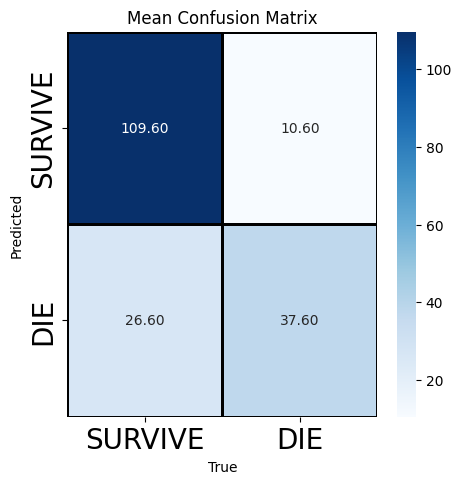

Class SURVIVE - Precision: 0.91, Recall: 0.80, F1 Score: 0.85, Support: 136.2
Class DEATH   - Precision: 0.59, Recall: 0.78, F1 Score: 0.67, Support: 48.2
Overall Accuracy: 0.7983


In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

def train_stackRF(X_train, y_train):
    model_list = [
        ('LogisticRegression', LogisticRegression(max_iter=1000)),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('XGBClassifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',))  # XGBoost 模型预先定义，权重稍后设置
    ]
    
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size = int(X_train_neg.shape[0] / 3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []
    
    for fold_num, (train_idx, _) in enumerate(skf.split(X_train_neg, y_train_neg)):
        model_name, model = model_list[fold_num % len(model_list)]
        
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_fold)
        X_fold = pd.DataFrame(X_train_scaled, columns=X_fold.columns, index=X_fold.index)
        #选feature
        
        
        if model_name == 'XGBClassifier':
            num_neg = np.sum(y_fold == 0)
            num_pos = np.sum(y_fold == 1)
            scale_pos_weight = num_neg / num_pos
            model.set_params(scale_pos_weight=scale_pos_weight)
        
        model.fit(X_fold, y_fold)
        models.append(model)
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        # 选择feature
        
        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)  

    final_pred = lin_reg.predict(predictions)
    final_pred = (final_pred > 0.5).astype(int)
    
    print('Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)
    
    return models, lin_reg

def test_models(models, lin_reg, X_test, y_test):
    print('Testing')
    scaler = MinMaxScaler()

    X_test_scale = scaler.fit_transform(X_test)
    X_test = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)
    test_predictions = []
    for model in models:
        pred = model.predict_proba(X_test)[:, 1] 
        test_predictions.append(pred)

    test_predictions = np.vstack(test_predictions).T

    final_pred = lin_reg.predict(test_predictions)

    final_pred_class = (final_pred > 0.5).astype(int) 
    


    return final_pred_class
    

data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')

columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]

# XGB
#X = X[['age', 'gender', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 'figglu_min', 
#       'figglu_max', 'figglu_avg', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_max', 'hem_avg', 'chl_max', 'chl_avg', 
#       'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'car_min', 'car_max', 'car_avg', 'rbc_min', 
#       'rbc_max', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_max', 
#       'res_min', 'res_max', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_1st Deg AV Block', 
#       'hear_last_Normal Sinus']]



# Random Forest
#X = X[['age', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 'figglu_min', 'figglu_max', 
#       'figglu_avg', 'pot_min', 'pot_max', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_min', 'hem_max', 'hem_avg', 'chl_min', 
#       'chl_max', 'chl_avg', 'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'hemo_max', 'hemo_avg', 
#       'car_min', 'car_max', 'car_avg', 'rbc_min', 'rbc_max', 'rbc_avg', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 
#       'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'mag_max', 'mag_avg', 'res_min', 'res_max', 'res_avg', 'spo_min', 
#       'spo_max', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_Asystole', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)



xgbs, lin_reg = train_stackRF(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg, X_test, y_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))




def cross_validate_models(X, y,n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg = train_stackRF(X_train, y_train)
        
        final_pred_class = test_models(xgbs, lin_reg, X_test, y_test)
        
        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")

cross_validate_models(X, y)

# Stack 3 models+ocsvm

Train single

OCSVM Train finish
0.5467480518236639
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       544
           1       0.94      1.00      0.97       193

    accuracy                           0.98       737
   macro avg       0.97      0.99      0.98       737
weighted avg       0.98      0.98      0.98       737

[[531  13]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8594594594594595
Confusion Matrix:
 [[124  13]
 [ 13  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       137
           1       0.73      0.73      0.73        48

    accuracy                           0.86       185
   macro avg       0.82      0.82      0.82       185
weighted avg       0.86      0.86      0.86       185



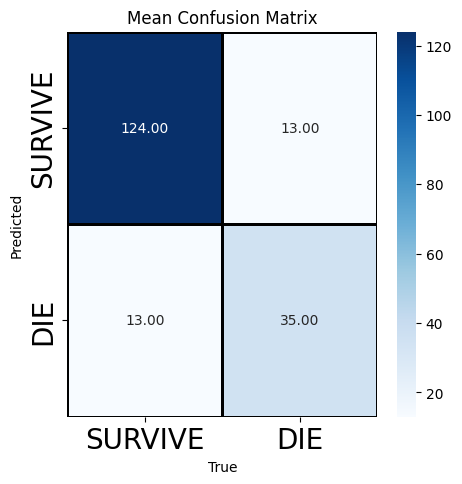

Cross val 

OCSVM Train finish
0.5351408876955034
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       545
           1       0.97      1.00      0.99       192

    accuracy                           0.99       737
   macro avg       0.99      1.00      0.99       737
weighted avg       0.99      0.99      0.99       737

[[540   5]
 [  0 192]]
Testing
OCSVM Train finish
0.5472862407245278
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       544
           1       0.96      1.00      0.98       193

    accuracy                           0.99       737
   macro avg       0.98      0.99      0.99       737
weighted avg       0.99      0.99      0.99       737

[[536   8]
 [  0 193]]
Testing
OCSVM Train finish
0.5616527991314287
(738, 1)
(738, 1)
Final Train result
              precision    recall  f1-score   s

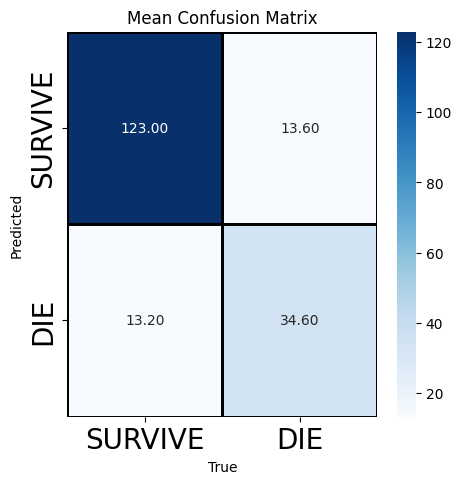

Class SURVIVE - Precision: 0.90, Recall: 0.90, F1 Score: 0.90, Support: 136.2
Class DEATH   - Precision: 0.72, Recall: 0.72, F1 Score: 0.72, Support: 48.2
Overall Accuracy: 0.8547


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import OneClassSVM
import seaborn as sns

def train_stackXGB(X_train, y_train):
    model_list = [
        ('LogisticRegression', LogisticRegression(max_iter=1000)),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('XGBClassifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',))  # XGBoost 模型预先定义，权重稍后设置
    ]
    
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size = int(X_train_neg.shape[0] / 3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []
    
    for fold_num, (train_idx, _) in enumerate(skf.split(X_train_neg, y_train_neg)):
        model_name, model = model_list[fold_num % len(model_list)]
        
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_fold)
        X_fold = pd.DataFrame(X_train_scaled, columns=X_fold.columns, index=X_fold.index)
        #选feature
        
        
        if model_name == 'XGBClassifier':
            num_neg = np.sum(y_fold == 0)
            num_pos = np.sum(y_fold == 1)
            scale_pos_weight = num_neg / num_pos
            model.set_params(scale_pos_weight=scale_pos_weight)
        
        model.fit(X_fold, y_fold)
        models.append(model)
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)        
        pred = model.predict_proba(X_train)[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)  
    
    return models, lin_reg

def train_one_class_svm(X_train, y_train):
    svm_train_X = X_train[y_train == 0] 
    oc_svm = OneClassSVM(nu=0.25, kernel="rbf", gamma=0.7)
    oc_svm.fit(svm_train_X)
    print('OCSVM Train finish')
    
    return oc_svm

def combined_train(X_train, y_train):
    xgbs, lin_reg_xgb = train_stackXGB(X_train, y_train)
    xgb_predictions = []
    for model in xgbs:
        pred = model.predict_proba(X_train)[:, 1] 
        xgb_predictions.append(pred)

    xgb_predictions = np.vstack(xgb_predictions).T
    stakxgb_pred = lin_reg_xgb.predict(xgb_predictions).reshape(-1, 1)
    #stakxgb_pred = (stakxgb_pred > 0.5).astype(int) 
    

    ocsvm = train_one_class_svm(X_train, y_train)
    svm_scores = ocsvm.decision_function(X_train)
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)
    print(thresh)

    ocsvm_pred = normalized_scores.reshape(-1, 1)
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1).reshape(-1, 1)

    
    print(stakxgb_pred.shape)
    print(ocsvm_pred.shape)
    
    combined_predictions = np.hstack([stakxgb_pred, ocsvm_pred])


    final_lin_reg = LinearRegression()
    final_lin_reg.fit(combined_predictions, y_train)
    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    

    
    print('Final Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)

    return xgbs, lin_reg_xgb, ocsvm,final_lin_reg


def test_models(models, lin_reg_xgb, ocsvm, final_lin_reg, X_test):
    print('Testing')
    predictions = []
    for model in models:
        pred = model.predict_proba(X_test)[:, 1] 
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    stakxgb_pred = lin_reg_xgb.predict(predictions)
    
    svm_scores = ocsvm.decision_function(X_test)
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)

    
    ocsvm_pred = normalized_scores
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1)
    
    combined_predictions = np.hstack([stakxgb_pred.reshape(-1, 1), ocsvm_pred.reshape(-1, 1)])

    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    
    return final_pred
    



def cross_validate_models(X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)
        
        final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)

        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")


data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
#data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')
columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']
X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Train single\n')
xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train)

final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))
cm = confusion_matrix(y_test, final_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Mean Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


print('Cross val \n')
cross_validate_models(X, y,)

# Stack 3 models + ocsvm + rfe featrures

Train single

OCSVM Train finish
0.66822110876925
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       544
           1       0.93      1.00      0.96       193

    accuracy                           0.98       737
   macro avg       0.97      0.99      0.98       737
weighted avg       0.98      0.98      0.98       737

[[530  14]
 [  0 193]]
Testing
Accuracy on Test Set: 0.8432432432432433
Confusion Matrix:
 [[121  16]
 [ 13  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       137
           1       0.69      0.73      0.71        48

    accuracy                           0.84       185
   macro avg       0.79      0.81      0.80       185
weighted avg       0.85      0.84      0.84       185



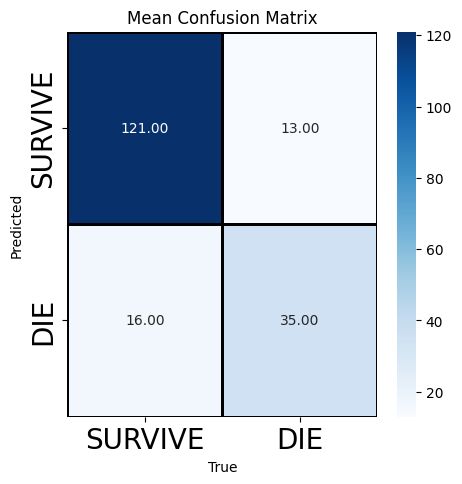

Cross val 

OCSVM Train finish
0.663780445869153
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       545
           1       0.96      1.00      0.98       192

    accuracy                           0.99       737
   macro avg       0.98      0.99      0.99       737
weighted avg       0.99      0.99      0.99       737

[[537   8]
 [  0 192]]
Testing
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       136
           1       0.84      0.98      0.91        49

    accuracy                           0.95       185
   macro avg       0.92      0.96      0.93       185
weighted avg       0.95      0.95      0.95       185

OCSVM Train finish
0.657396537880961
(737, 1)
(737, 1)
Final Train result
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       544
           1       0.9

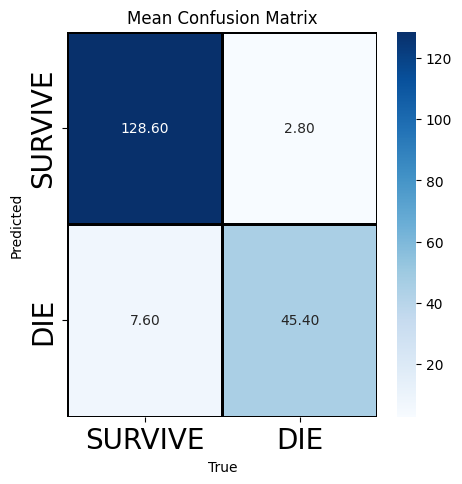

Class SURVIVE - Precision: 0.98, Recall: 0.94, F1 Score: 0.96, Support: 136.2
Class DEATH   - Precision: 0.86, Recall: 0.94, F1 Score: 0.90, Support: 48.199999999999996
Overall Accuracy: 0.9436


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import OneClassSVM
import seaborn as sns

def train_stackXGB(X_train, y_train, features):
    model_list = [
        ('Logi', LogisticRegression(max_iter=1000)),
        ('RF', RandomForestClassifier()),
        ('XGB', xgb.XGBClassifier())  # XGBoost 模型预先定义，权重稍后设置
    ]
    
    np.random.seed(42)
    X_train_neg = X_train[y_train == 0]
    X_train_pos = X_train[y_train == 1]
    y_train_neg = y_train[y_train == 0]
    y_train_pos = y_train[y_train == 1]
    group_size = int(X_train_neg.shape[0] / 3 + X_train_pos.shape[0])

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    models = []
    predictions = []
    
    for fold_num, (train_idx, _) in enumerate(skf.split(X_train_neg, y_train_neg)):
        model_name, model = model_list[fold_num % len(model_list)]
        feature = features[model_name]
        
        X_fold_neg = X_train_neg.iloc[train_idx]
        if len(X_fold_neg) < group_size:
            extra_idx = np.random.choice(X_fold_neg.index, size=group_size - len(X_fold_neg), replace=True)
            X_fold_neg = pd.concat([X_fold_neg, X_train_neg.loc[extra_idx]])

        X_fold = pd.concat([X_fold_neg, X_train_pos])
        y_fold = pd.concat([y_train_neg.loc[X_fold_neg.index], y_train_pos])
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_fold)
        X_fold = pd.DataFrame(X_train_scaled, columns=X_fold.columns, index=X_fold.index)
        #选feature
        
        
        if model_name == 'XGB':
            num_neg = np.sum(y_fold == 0)
            num_pos = np.sum(y_fold == 1)
            scale_pos_weight = num_neg / num_pos
            model.set_params(scale_pos_weight=scale_pos_weight)
        
        model.fit(X_fold[feature], y_fold)
        models.append(model)
        scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        # 选择feature
        
        pred = model.predict_proba(X_train[feature])[:, 1]
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    lin_reg = LinearRegression()
    lin_reg.fit(predictions, y_train)  
    
    return models, lin_reg

def train_one_class_svm(X_train, y_train):
    svm_train_X = X_train[y_train == 0] 
    oc_svm = OneClassSVM(nu=0.25, kernel="rbf", gamma=0.7)
    oc_svm.fit(svm_train_X)
    print('OCSVM Train finish')
    
    return oc_svm

def combined_train(X_train, y_train, features):
    xgbs, lin_reg_xgb = train_stackXGB(X_train, y_train, features)
    xgb_predictions = []
    models = ['Logi', 'RF', "XGB"]
    for idx, model in enumerate(xgbs):
        feature = features[models[idx]]
        pred = model.predict_proba(X_train[feature])[:, 1] 
        xgb_predictions.append(pred)

    xgb_predictions = np.vstack(xgb_predictions).T
    stakxgb_pred = lin_reg_xgb.predict(xgb_predictions).reshape(-1, 1)
    #stakxgb_pred = (stakxgb_pred > 0.5).astype(int) 
    

    ocsvm = train_one_class_svm(X_train[features['OCSVM']], y_train)
    svm_scores = ocsvm.decision_function(X_train[features['OCSVM']])
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)
    print(thresh)

    ocsvm_pred = normalized_scores.reshape(-1, 1)
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1).reshape(-1, 1)

    
    print(stakxgb_pred.shape)
    print(ocsvm_pred.shape)
    
    combined_predictions = np.hstack([stakxgb_pred, ocsvm_pred])


    final_lin_reg = LinearRegression()
    final_lin_reg.fit(combined_predictions, y_train)
    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    

    
    print('Final Train result')
    print(classification_report(y_train, final_pred))
    cm = confusion_matrix(y_train, final_pred)
    print(cm)

    return xgbs, lin_reg_xgb, ocsvm,final_lin_reg


def test_models(models, lin_reg_xgb, ocsvm, final_lin_reg, X_test, features):
    print('Testing')
    predictions = []
    models = ['Logi', 'RF', "XGB"]
    for idx, model in enumerate(xgbs):
        feature = features[models[idx]]
        pred = model.predict_proba(X_test[feature])[:, 1] 
        predictions.append(pred)

    predictions = np.vstack(predictions).T
    stakxgb_pred = lin_reg_xgb.predict(predictions)
    
    svm_scores = ocsvm.decision_function(X_test[features['OCSVM']])
    mean_val = svm_scores.mean()
    std_val = svm_scores.std()
    standardized_scores = (svm_scores - mean_val) / std_val
    min_val = standardized_scores.min()
    max_val = standardized_scores.max()
    normalized_scores = (standardized_scores - min_val) / (max_val - min_val)

    #   remains to be done, 
    #   the thresh calculated, which should be the best value, turns out is not good enough
    thresh = (0 - min_val) / (max_val - min_val)

    
    ocsvm_pred = normalized_scores
    #ocsvm_pred = np.where(normalized_scores > 0.45, 0,1)
    
    combined_predictions = np.hstack([stakxgb_pred.reshape(-1, 1), ocsvm_pred.reshape(-1, 1)])

    final_pred = final_lin_reg.predict(combined_predictions)
    final_pred = np.where(final_pred < 0.5, 0 , 1)
    
    return final_pred
    



def cross_validate_models(X, y, features, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []  
    all_cm = [] 

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

        xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train, features)
        
        final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test, features)

        accuracy = accuracy_score(y_test, final_pred_class)
        cm = confusion_matrix(y_test, final_pred_class)
        print("Classification Report:\n", classification_report(y_test, final_pred_class))
        
        accuracies.append(accuracy)
        all_cm.append(cm)

    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy: {mean_accuracy:.4f}")

    mean_cm = np.mean(all_cm, axis=0)
    plt.figure(figsize=(5,5))
    sns.heatmap(mean_cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
    plt.title('Mean Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('True')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    TN, FP = mean_cm[0, 0], mean_cm[0, 1]
    FN, TP = mean_cm[1, 0], mean_cm[1, 1]
    
    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    support_0 = TN + FP
    support_1 = TP + FN
    
    print(f"Class SURVIVE - Precision: {precision_0:.2f}, Recall: {recall_0:.2f}, F1 Score: {f1_0:.2f}, Support: {support_0}")
    print(f"Class DEATH   - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1 Score: {f1_1:.2f}, Support: {support_1}")
    print(f"Overall Accuracy: {accuracy:.4f}")


#data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill.csv')
data = pd.read_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\cleaned_data\cleaned_data_allfill_withComro.csv')
columns_to_drop = ['subject_id', 'icustay_id', 'hospital_expire_flag', 'expire_flag', 'died_immediately']

features = {'OCSVM': ['age', 'icu_times', 'icu_times_total', 'icu_times_sepsis', 'icu_times_total_sepsis', 'glu_min', 'glu_avg', 
          'figglu_min', 'figglu_max', 'figglu_avg', 'pot_min', 'pot_max', 'pot_avg', 'hem_min', 'hem_max', 'hem_avg', 
          'bun_min', 'bun_avg', 'cre_avg', 'hemo_max', 'car_min', 'car_max', 'car_avg', 'pla_min', 'wbc_min', 'hea_min',
          'hea_max', 'hea_avg', 'mag_min', 'res_min', 'res_avg', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_min',
          'temp_max', 'hear_mode_1st Deg AV Block', 'hear_mode_Atrial Flutter', 'hear_mode_Sinus Brady', 
          'hear_mode_Sinus Tachy', 'hear_mode_V Paced', 'hear_last_Asystole', 'hear_last_Atrial Fib', 
          'hear_last_Normal Sinus', 'hear_last_Other/Remarks', 'hear_last_Supravent Tachy', 'hear_last_V Paced'], 
 'XGB': ['age', 'gender', 'icu_duration_hour', 'icu_times', 'icu_times_total', 'glu_min', 'glu_max', 'glu_avg', 
         'figglu_min', 'figglu_max', 'figglu_avg', 'pot_avg', 'sod_min', 'sod_max', 'sod_avg', 'hem_max', 'hem_avg', 
         'chl_max', 'chl_avg', 'bun_min', 'bun_max', 'bun_avg', 'cre_min', 'cre_max', 'cre_avg', 'hemo_min', 'car_min', 
         'car_max', 'car_avg', 'rbc_min', 'rbc_max', 'pla_min', 'pla_max', 'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 
         'hea_min', 'hea_max', 'hea_avg', 'mag_max', 'res_min', 'res_max', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 
         'temp_max', 'temp_avg', 'hear_last_1st Deg AV Block', 'hear_last_Normal Sinus'],
 'RF': ['age', 'icu_duration_hour', 'glu_min', 'glu_avg', 'figglu_min', 'figglu_avg', 'pot_min', 'pot_max', 'pot_avg', 
        'sod_min', 'sod_avg', 'hem_min', 'hem_max', 'hem_avg', 'chl_min', 'chl_max', 'chl_avg', 'bun_min', 'bun_max', 
        'bun_avg', 'hemo_min', 'hemo_max', 'hemo_avg', 'car_min', 'car_max', 'car_avg', 'rbc_min', 'pla_min', 'pla_max', 
        'pla_avg', 'wbc_min', 'wbc_max', 'wbc_avg', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'mag_avg', 'res_min', 
        'res_max', 'res_avg', 'spo_min', 'spo_avg', 'spo_alarms', 'temp_min', 'temp_max', 'temp_avg', 'hear_last_Asystole',
        'hear_last_Normal Sinus'],
 'Logi': ['age', 'icu_times', 'icu_times_total', 'icu_times_sepsis', 'icu_times_total_sepsis', 'glu_min', 'glu_avg', 
          'figglu_min', 'figglu_max', 'figglu_avg', 'pot_min', 'pot_max', 'pot_avg', 'hem_min', 'hem_max', 'hem_avg', 
          'bun_min', 'bun_avg', 'cre_avg', 'hemo_max', 'car_min', 'car_max', 'car_avg', 'pla_min', 'wbc_min', 'hea_min',
          'hea_max', 'hea_avg', 'mag_min', 'res_min', 'res_avg', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_min',
          'temp_max', 'hear_mode_1st Deg AV Block', 'hear_mode_Atrial Flutter', 'hear_mode_Sinus Brady', 
          'hear_mode_Sinus Tachy', 'hear_mode_V Paced', 'hear_last_Asystole', 'hear_last_Atrial Fib', 
          'hear_last_Normal Sinus', 'hear_last_Other/Remarks', 'hear_last_Supravent Tachy', 'hear_last_V Paced']}




X = data.drop(columns=columns_to_drop)
#X = X[['marital_SINGLE', 'icu_times', 'icu_times_sepsis', 'hem_avg', 'bun_min', 'bun_max', 'car_min', 'car_avg', 'pla_min',
#       'wbc_max', 'hea_min', 'hea_max', 'hea_avg', 'mag_min', 'spo_min', 'spo_max', 'spo_avg', 'spo_alarms', 'temp_avg', 'hear_last_Normal Sinus']]
y = data['died_immediately']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Train single\n')
xgbs, lin_reg_xgb, ocsvm,final_lin_reg = combined_train(X_train, y_train, features)

final_pred_class = test_models(xgbs, lin_reg_xgb, ocsvm, final_lin_reg, X_test, features)
print("Accuracy on Test Set:", accuracy_score(y_test, final_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred_class))
print("Classification Report:\n", classification_report(y_test, final_pred_class))
cm = confusion_matrix(y_test, final_pred_class)
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='.2f', xticklabels=['SURVIVE', 'DIE'], yticklabels=['SURVIVE', 'DIE'])
plt.title('Mean Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


print('Cross val \n')
cross_validate_models(X, y, features)